# Breast Cancer Classification with a simple Neural Network (NN)

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

### Load the dataset from sklearn

In [304]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [305]:
breast_cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [306]:
# just printing column names
breast_cancer_dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [307]:
# just printing the data (values) of columns
breast_cancer_dataset.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30))

In [308]:
# just printing the target (labels) of columns
display(breast_cancer_dataset.target)

# display the target names
display(breast_cancer_dataset.target_names)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

array(['malignant', 'benign'], dtype='<U9')

### Now select the `features` (column names) and `labels` (data)

In [309]:
# loading the data to a data frame
df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [310]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### As there is no target column, we need to create one

In [311]:
df['target'] = breast_cancer_dataset.target

In [312]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [313]:
# function for headings
def heading(title):
    print(f"{'=' * len(title)}")
    print(f"{title.upper()}")
    print(f"{'=' * len(title)}")

heading('Headings')

HEADINGS


In [314]:
heading("Nubmer of rows and columns")
print("Nubmer of rows are:", df.shape[0])
print("Nubmer of columns are:", df.shape[1])

NUBMER OF ROWS AND COLUMNS
Nubmer of rows are: 569
Nubmer of columns are: 31


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### As we can see, we have total **`569 rows`** and there is **569** **`non-null`** values in each column and so, there is `no null values`

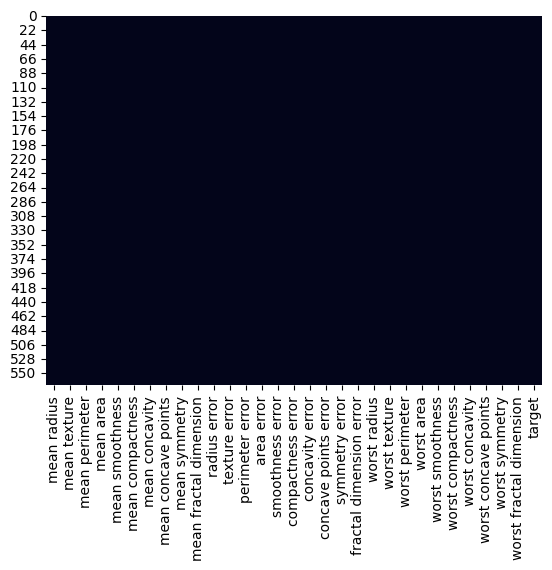

In [316]:
# checking for null values
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [317]:
# statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


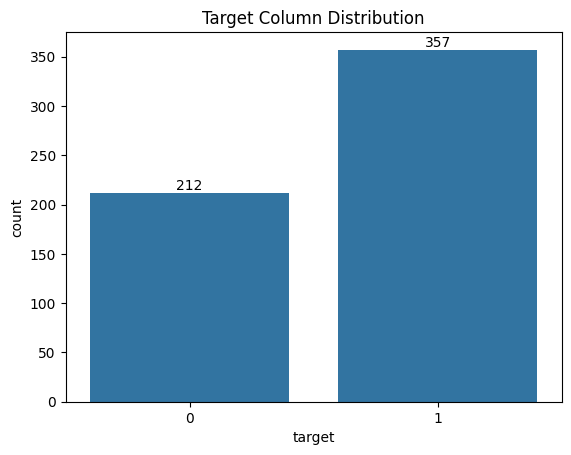

target
1    357
0    212
Name: count, dtype: int64

In [318]:
# checking for class distribution
ax = sns.countplot(x='target', data=df,)
for count in ax.containers:
    ax.bar_label(count)
plt.title('Target Column Distribution')
plt.show()


df['target'].value_counts()

1 --> Benign

0 --> Malignant

### separating the features and the labels

In [319]:
X = df.drop('target', axis=1)
Y = df['target']

### splitting the data into train and test sets

In [320]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

### Standardize the data

In [321]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [322]:
# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [323]:
X_train.shape[1]

30

In [324]:
Y_train.nunique()

2

### Flatten is used to convert multi-dimensional input (e.g. images) into a 1D vector before Dense layers.
### Dense layers are fully connected layers that learn patterns from input features — used directly for tabular data.


In [325]:
# creating a model and adding layers
model = tf.keras.models.Sequential([
    # input layer
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # X_train.shape[1] = columns or features
    # hidden layer
    tf.keras.layers.Dense(32, activation='relu'),
    # output layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # 1 output neuron for binary classification
])


# compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.3951 - loss: 0.7623 - val_accuracy: 0.9130 - val_loss: 0.4815
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9412 - loss: 0.4248 - val_accuracy: 0.9783 - val_loss: 0.3100
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9669 - loss: 0.2761 - val_accuracy: 0.9783 - val_loss: 0.2096
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9669 - loss: 0.1854 - val_accuracy: 0.9783 - val_loss: 0.1552
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9742 - loss: 0.1326 - val_accuracy: 0.9783 - val_loss: 0.1258
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9804 - loss: 0.1022 - val_accuracy: 0.9783 - val_loss: 0.1078
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9844 - loss: 0.0836 - val_accuracy: 0.9783 - val_loss: 0.0959
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9852 - loss: 0.0716 - val_accuracy: 0.9783 - v

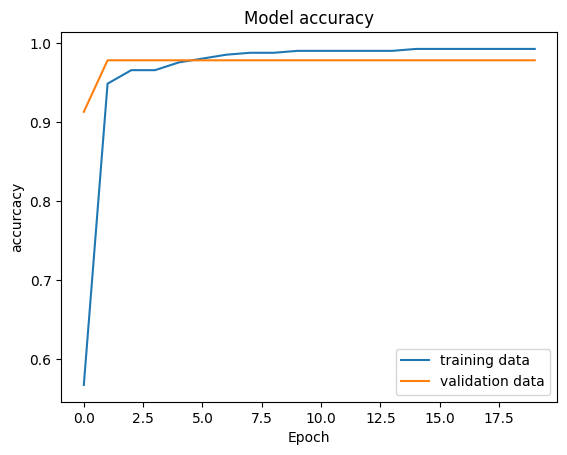

CPU times: total: 6.73 s
Wall time: 12 s


In [326]:
%%time
# Training the model
history = model.fit(
    X_train_std, 
    Y_train, 
    # validation_data=(X_test, Y_test),
    validation_split=0.1,
    epochs=20, # number of iterations
    batch_size=32, # number of samples
    verbose=1 # show progress
    )

# loss = model.evaluate(X_test, Y_test, verbose=0)
# loss

# Plotting the training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('accurcacy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()


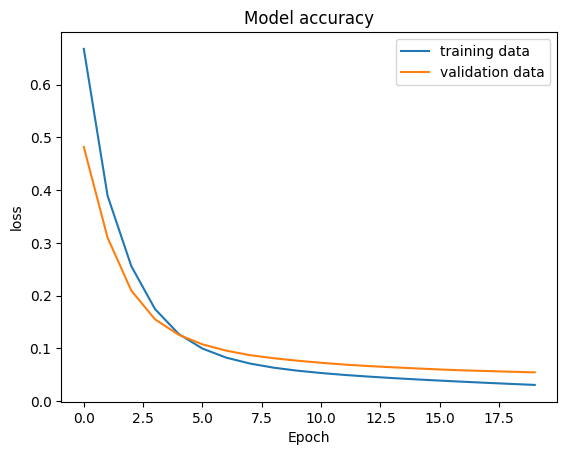

In [327]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model accuracy')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()


### Evaluating the model

In [328]:
# Evaluating the model on test data
loss, accuracy = model.evaluate(X_test_std, Y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9714 - loss: 0.0825 
Test Accuracy: 0.9649122953414917


In [329]:
# Evaluating the model on training data
loss, accuracy = model.evaluate(X_train_std, Y_train, verbose=1)
print(f"Train Accuracy: {accuracy}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9913 - loss: 0.0334
Train Accuracy: 0.9912087917327881


In [330]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [331]:
Y_pred = model.predict(X_test_std)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/stepWARNING:tensorflow:5 out of the last 30 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000023E82D8CA40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [332]:
print(Y_pred.shape)
print(Y_pred)

(114, 1)
[[9.24027383e-01]
 [6.42783165e-01]
 [9.98791695e-01]
 [8.37963271e-13]
 [8.85338843e-01]
 [5.96078209e-08]
 [9.46108758e-01]
 [9.99658167e-01]
 [9.98156071e-01]
 [9.97560680e-01]
 [3.15269083e-02]
 [9.45038319e-01]
 [8.15262794e-01]
 [9.65747297e-01]
 [9.97808933e-01]
 [7.31548716e-05]
 [9.97995496e-01]
 [9.98730838e-01]
 [9.97763872e-01]
 [9.66413381e-07]
 [9.99941349e-01]
 [9.99124825e-01]
 [9.96828020e-01]
 [9.99658525e-01]
 [9.81419265e-01]
 [1.24981789e-05]
 [9.89877701e-01]
 [9.36973453e-01]
 [4.68028084e-05]
 [1.03690190e-05]
 [9.82784808e-01]
 [9.96536911e-01]
 [9.98496652e-01]
 [1.07728722e-11]
 [7.22351899e-07]
 [9.93543983e-01]
 [9.99840856e-01]
 [9.77786958e-01]
 [9.99279618e-01]
 [9.98682737e-01]
 [3.51964465e-11]
 [1.13267833e-02]
 [9.98450994e-01]
 [9.99175012e-01]
 [7.19720556e-04]
 [9.98024940e-01]
 [9.99938846e-01]
 [9.96430159e-01]
 [2.92454372e-09]
 [4.30300461e-05]
 [9.98406708e-01]
 [4.69414843e-03]
 [2.13445857e-01]
 [9.98586237e-01]
 [9.99668956e-01]
 

In [333]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
[[0.9980144]]
[np.int64(0)]
The tumor is Malignant


📌 This project is part of my portfolio. Feel free to explore, fork, or reach out with feedback!